### Naver API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
CLIENT_ID, CLIENT_SECRET = "KcavGNB3lps84cp5kzJp", "CpZgLBr_NB"

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [3]:
# 1. URL
url = "https://openapi.naver.com/v1/papago/n2mt"

In [4]:
# 2. request > response
msg = "데이터 사이언스는 재미있습니다."
params = { "source": "ko", "target": "en", "text": msg }
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,
}
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [5]:
# 3. parsing
response.json()["message"]["result"]["translatedText"]

'Data science is fun.'

In [6]:
# 4. 함수로 만들기
def translate(msg):
    url = "https://openapi.naver.com/v1/papago/n2mt"
    params = { "source": "ko", "target": "en", "text": msg }
    headers = {
        "Content-Type": "application/json",
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET,
    }
    response = requests.post(url, json.dumps(params), headers=headers)
    return response.json()["message"]["result"]["translatedText"]

In [7]:
msg = "데이터 분석 및 크롤링"
translated_text = translate(msg)
translated_text

'Data Analysis and Crawling'

#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [8]:
# 1. URL
url = "https://openapi.naver.com/v1/datalab/search"

In [9]:
# 2. request > response
params = {
    "startDate": "2018-01-01",
    "endDate": "2023-02-16",
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": "트위터", "keywords": ["트위터", "트윗"]},
        {"groupName": "페이스북", "keywords": ["페이스북", "페북"]},
        {"groupName": "인스타그램", "keywords": ["인스타그램", "인스타"]},
    ]
}

In [10]:
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,    
}

In [11]:
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [12]:
# 3. parsing
datas = response.json()["results"]

In [13]:
dfs = []
for data in datas:
    df = pd.DataFrame(data["data"])
    df["title"] = data["title"] # 트위터, 페이스북, 인스타그램
    dfs.append(df)

In [14]:
# 4. preprocessing

In [15]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
184,2023-01-01,20.30135,인스타그램
185,2023-02-01,19.49800,인스타그램


In [16]:
pivot_df = result_df.pivot("period", "title", "ratio")
pivot_df.columns = ["instagram", "twitter", "facebook"]
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,19.49800,25.43963,12.93779


In [17]:
# 5. visualization

In [18]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [19]:
import matplotlib.pyplot as plt

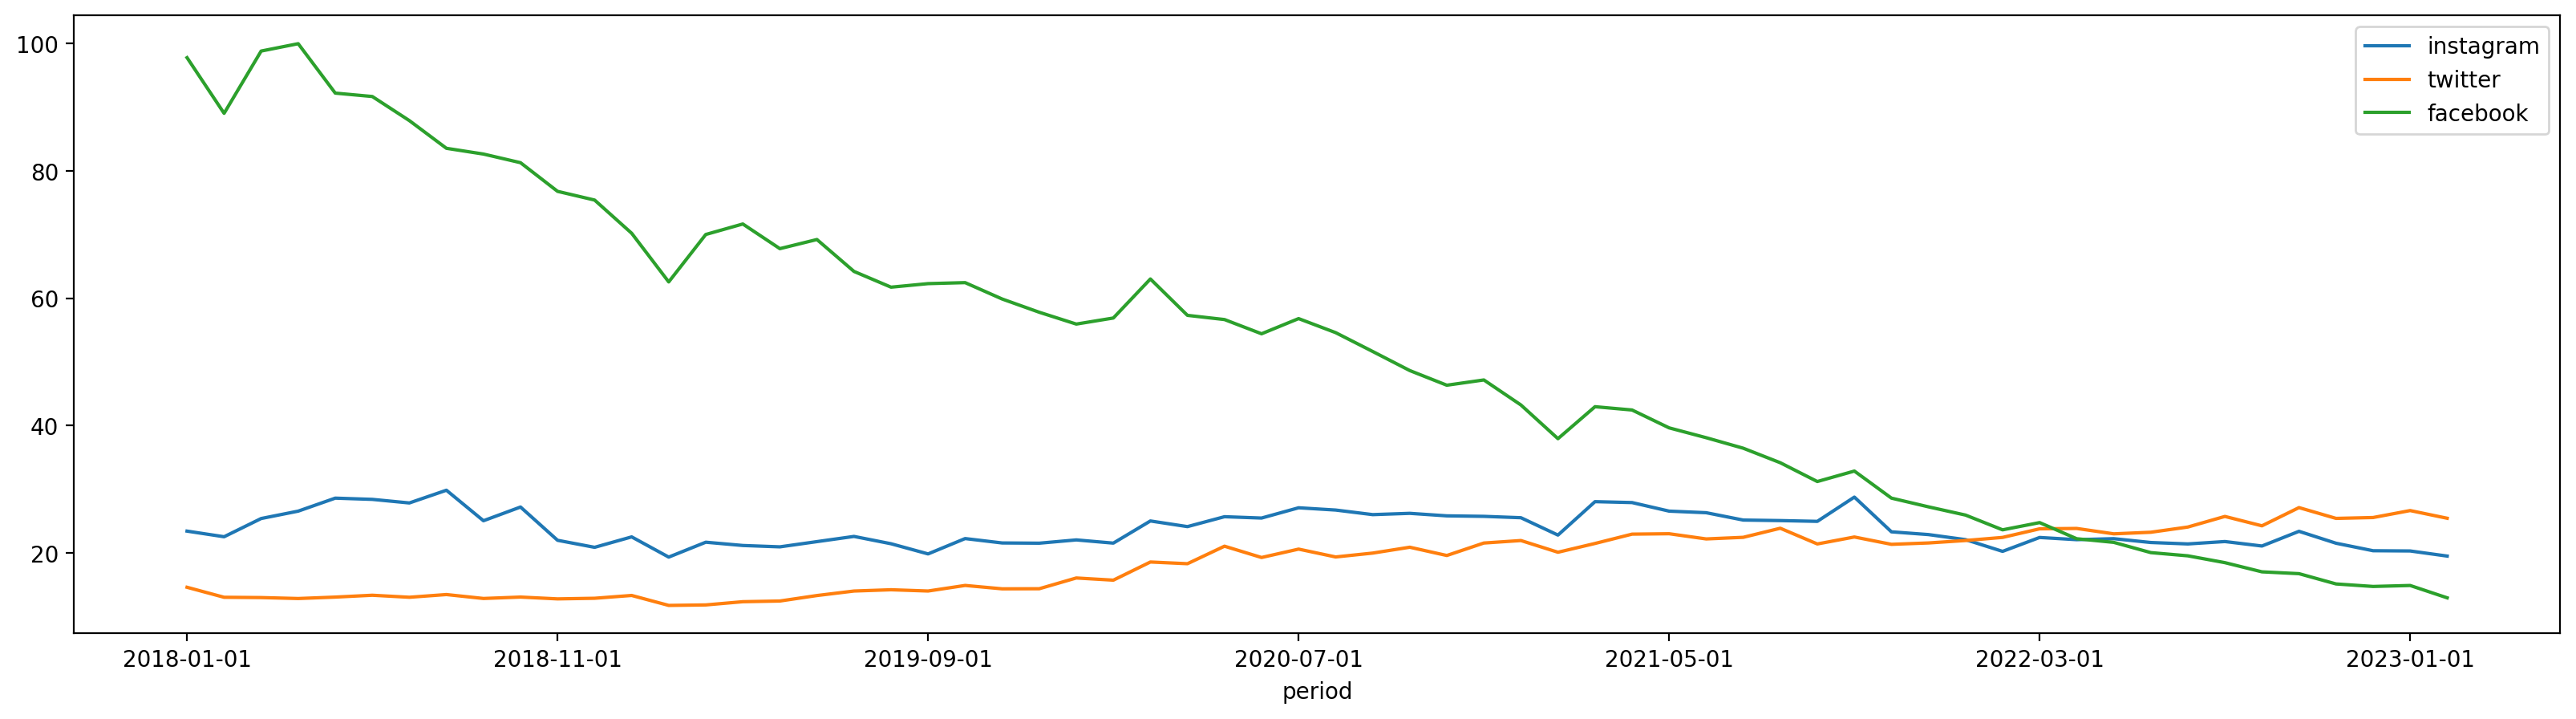

In [20]:
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()

### 공공 데이터 포털
- data.go.kr
- 국토교통부_(TAGO)_카셰어링정보
- `https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15098557`

In [21]:
# 1. application registration : key
key = '9DVRoYNb5q7dPwxtUnB1srriOEJZbGb/cOlrFAPBNTxsujahRRWPCwdcZ0KYj87rkw9Uw3GBhecH3PL3aYLiRw=='

In [22]:
# 2. find url from document
zonename = '서울역'
url = 'http://apis.data.go.kr/1613000/CarSharingInfoService/getCarZoneListByName'
url += f'?serviceKey={key}&zoneName={zonename}&_type=json'
url

'http://apis.data.go.kr/1613000/CarSharingInfoService/getCarZoneListByName?serviceKey=9DVRoYNb5q7dPwxtUnB1srriOEJZbGb/cOlrFAPBNTxsujahRRWPCwdcZ0KYj87rkw9Uw3GBhecH3PL3aYLiRw==&zoneName=서울역&_type=json'

In [23]:
# 3. request(url) > response : json(str)
response = requests.get(url)
response

<Response [200]>

In [24]:
# 4. json(str) > list, dict > DataFrame
data = response.json()['response']['body']['items']['item']
df = pd.DataFrame(data)
df.tail(2)

,address,latitude,longitude,type,zoneId,zoneName
5,서울 용산구 동자동 56 트윈시티 남산,37.551189,126.972939,2,7426,서울역 12번출구(갈월동)
6,서울 용산구 서계동 47-2 대한통운서울지사,37.552486,126.968964,2,9442,서울역 15번출구(국립극단옆EV)
